IQFeed 5 Sec data is saved at windows system using code there. Need to import from that system

In [2]:
import pandas as pd
import numpy as np
import urllib2
import urllib
import datetime
import datetime as dt
from datetime import datetime
from pytz import timezone
import pytz
from time import gmtime, strftime
import time
import os
from random import randint
import math
import seaborn
from matplotlib import interactive
interactive(False)
from pylab import rcParams
from pandas_datareader import data as web
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6
%matplotlib inline
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [3]:
os.environ['TZ'] = ':US/Eastern'; 
time.tzset()
ti=time.strftime("%H%M%S")
int(ti)

55110

In [4]:
#%run iqfeed_download.py 
#^^ above code is saved at 

In [4]:
path = '/home/octo/Desktop/PROJECT_1/IQ_data/'

In [31]:
data_price=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)
spy=pd.read_csv(path + 'SPY.csv',names = ["high", "low", "open","close","total_volume","volume"],index_col=0, parse_dates=True)

In [6]:
len(data_price)

570987

In [7]:
import TA

In [8]:
#https://mrjbq7.github.io/ta-lib/func.html
import talib

In [9]:
length=30

In [89]:
#pivot line 

In [33]:
P=(data_price.high+data_price.low+data_price.close)/3#P=pd.rolling_mean(P,60)
R1=P*2-data_price.low
R2=P+(data_price.high-data_price.low)
S1=P*2-data_price.high
S2=P-(data_price.high-data_price.low)

In [12]:
from numba import jit
@jit
def vwap():
    return np.cumsum(data_price.volume*(data_price.high+data_price.low+data_price.open+data_price.close)/4) / np.cumsum(data_price.volume)

In [15]:
##data_price['vwap'] = vwap()

In [18]:
data_price['vwap'] =pd.rolling_sum(data_price.volume*P,length)/pd.rolling_sum(data_price.volume,length)

In [ ]:
#data_price['ADX']=np.where(talib.ADX(np.asarray(data_price['close']),np.asarray(data_price['low']),np.asarray(data_price['high']),timeperiod=15)>35,1,0)

In [20]:
data_price['ATR']=talib.ATR(np.asarray(data_price['high']),np.asarray(data_price['low']),np.asarray(data_price['close']),timeperiod=15)

In [24]:
pd.rolling_max(P,15)

2016-05-16 09:30:05           NaN
2016-05-16 09:30:10           NaN
2016-05-16 09:30:15           NaN
2016-05-16 09:30:20           NaN
2016-05-16 09:30:25           NaN
2016-05-16 09:30:30           NaN
2016-05-16 09:30:35           NaN
2016-05-16 09:30:40           NaN
2016-05-16 09:30:45           NaN
2016-05-16 09:30:50           NaN
2016-05-16 09:30:55           NaN
2016-05-16 09:31:00           NaN
2016-05-16 09:31:05           NaN
2016-05-16 09:31:10           NaN
2016-05-16 09:31:15    205.016667
2016-05-16 09:31:20    205.016667
2016-05-16 09:31:25    205.016667
2016-05-16 09:31:30    205.016667
2016-05-16 09:31:35    205.016667
2016-05-16 09:31:40    205.016667
2016-05-16 09:31:45    205.035533
2016-05-16 09:31:50    205.076667
2016-05-16 09:31:55    205.098333
2016-05-16 09:32:00    205.114667
2016-05-16 09:32:05    205.140000
2016-05-16 09:32:10    205.140367
2016-05-16 09:32:15    205.150000
2016-05-16 09:32:20    205.150000
2016-05-16 09:32:25    205.150000
2016-05-16 09:

In [21]:
data_price=data_price.dropna()

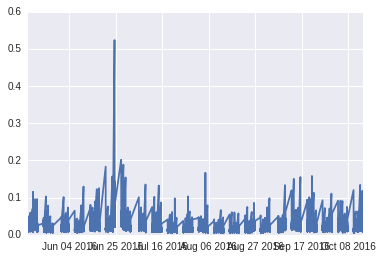

In [22]:
#plt.plot(data_price.vwap)
plt.plot(data_price.ATR)

In [55]:
#Calculating momentum of the close prices, with a time period of 5:
#data_price['momentum'] = talib.MOM(np.asarray(data_price['close']), timeperiod=length)

In [59]:
#data_price['ROC'] = talib.ROC(np.asarray(data_price['close']), timeperiod=length)# good distribution of return -1 to +1 

In [58]:
#data_price['RSI'] = np.where(talib.RSI(np.asarray(data_price['close']), timeperiod=15)>65,1,np.where(talib.RSI(np.asarray(data_price['close']), timeperiod=15)<35,-1,0))

In [51]:
#data_price.dropna().plot(y= ['momentum'], title='SPY Close & Momentum',figsize = [15,15])

In [57]:
#pd.DataFrame.hist(data_price[['ROC']],bins=50,figsize = [5,5]);

In [65]:
#data_price[['ROC','momentum']]
#data_price.dropna().plot(y= ['momentum'], title='SPY Close & Momentum',figsize = [15,15])
#data_price.dropna().plot(y= ['ROC'], title='SPY Close & Momentum',figsize = [15,15])

In [61]:
#pd.DataFrame.hist(data_price[['RSI']],bins=10,figsize = [5,5]);

In [33]:
pd.DataFrame.hist(data_price[['ADX']],bins=10,figsize = [5,5]);

In [64]:
#data_price['return']= np.where(data_price['open']>data_price['close'].shift(1),1,np.where(data_price['open']<data_price['close'].shift(1),-1,0))
#data_price['volume_ch']=data_price['volume']/data_price['volume'].shift(1)
#data_price['4Ch'] = data_price['open']-data_price['close'].shift(4)
#data_price['4VCh'] =data_price['volume']/data_price['volume'].shift(4)
#data_price['19Ch'] = data_price['open']-data_price['close'].shift(19)
#data_price['19VCh'] = data_price['volume']/data_price['volume'].shift(19)

In [50]:
data_price.dropna().head(2)

,high,low,open,close,total_volume,volume,momentum,ROC_4,RSI,ADX,return,volume_ch,4Ch,4VCh,19Ch,19VCh
2016-08-05 09:34:15,217.2800,217.25,217.28,217.28,5260488,10132,0.03,0.059866,1,0,1,0.935463,0.0300,0.655666,0.17,0.294014
2016-08-05 09:34:20,217.2737,217.25,217.27,217.25,5263046,2410,0.06,0.036838,0,0,-1,0.237860,0.0108,0.276060,0.15,0.202504


In [66]:
##volume above 1 to get trend 
#data_price['4J']=np.where(data_price['4Ch']>0.05,1,np.where(data_price['4Ch']<-0.05,-1,0))
#data_price['4jHV']=np.where(np.logical_and(data_price['4J']==1,data_price['4VCh']>1.2),1,np.where(np.logical_and(data_price['4J']==-1,data_price['4VCh']>1.2),-1,0))

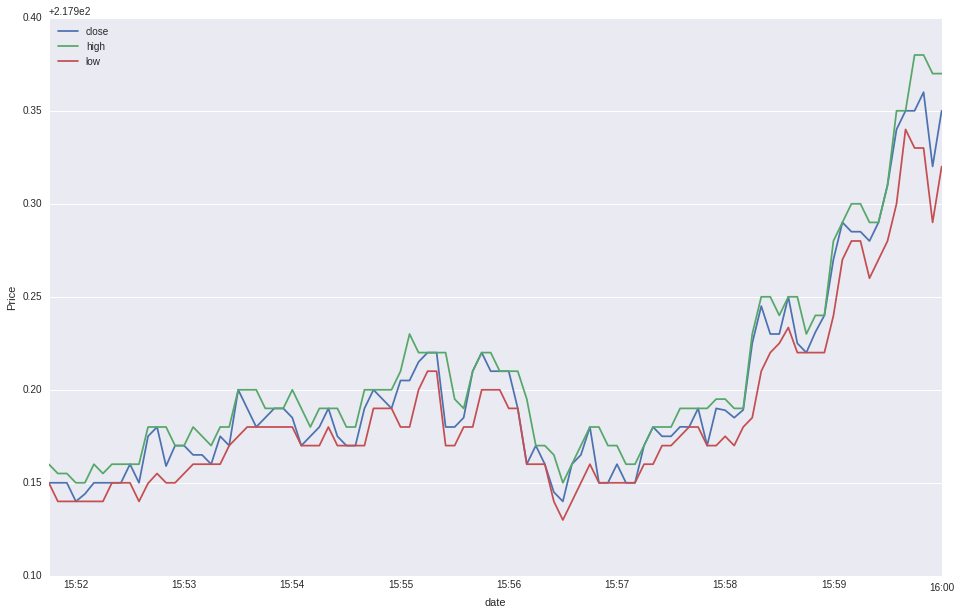

In [15]:
data_price[['close','high','low']].tail(100).plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Price')

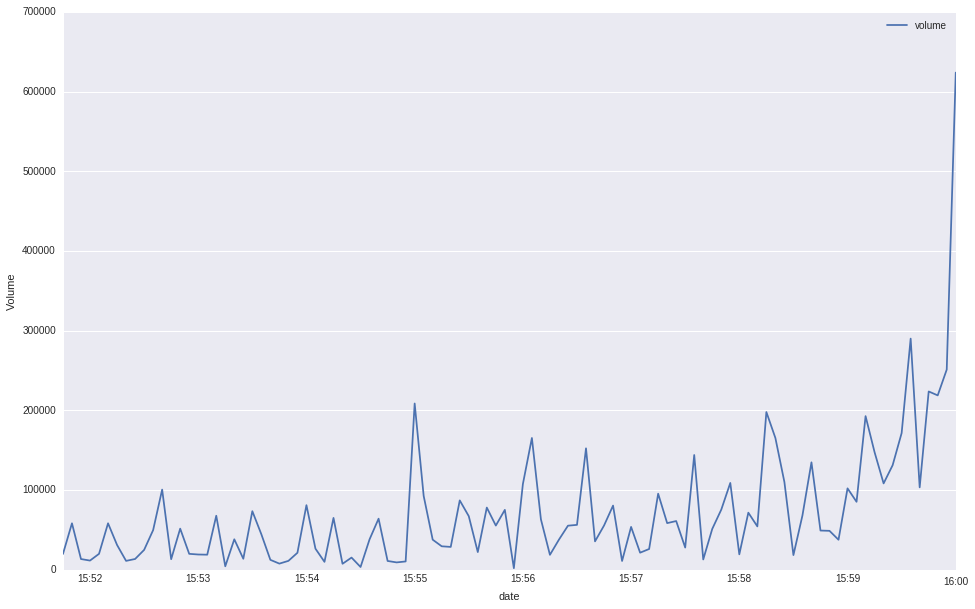

In [14]:
data_price[['volume']].tail(100).plot(figsize=(16, 10))
plt.xlabel('date')
plt.ylabel('Volume')

In [19]:
data_price['Return'] = np.log(data_price['open'] /data_price['close'].shift(1))

In [23]:
  # reads data from Google Finance
data_price['14t'] = pd.rolling_mean(data_price['close'], 14)
data_price['42t'] = pd.rolling_mean(data_price['close'], 42)
  # 42d and 252d trends

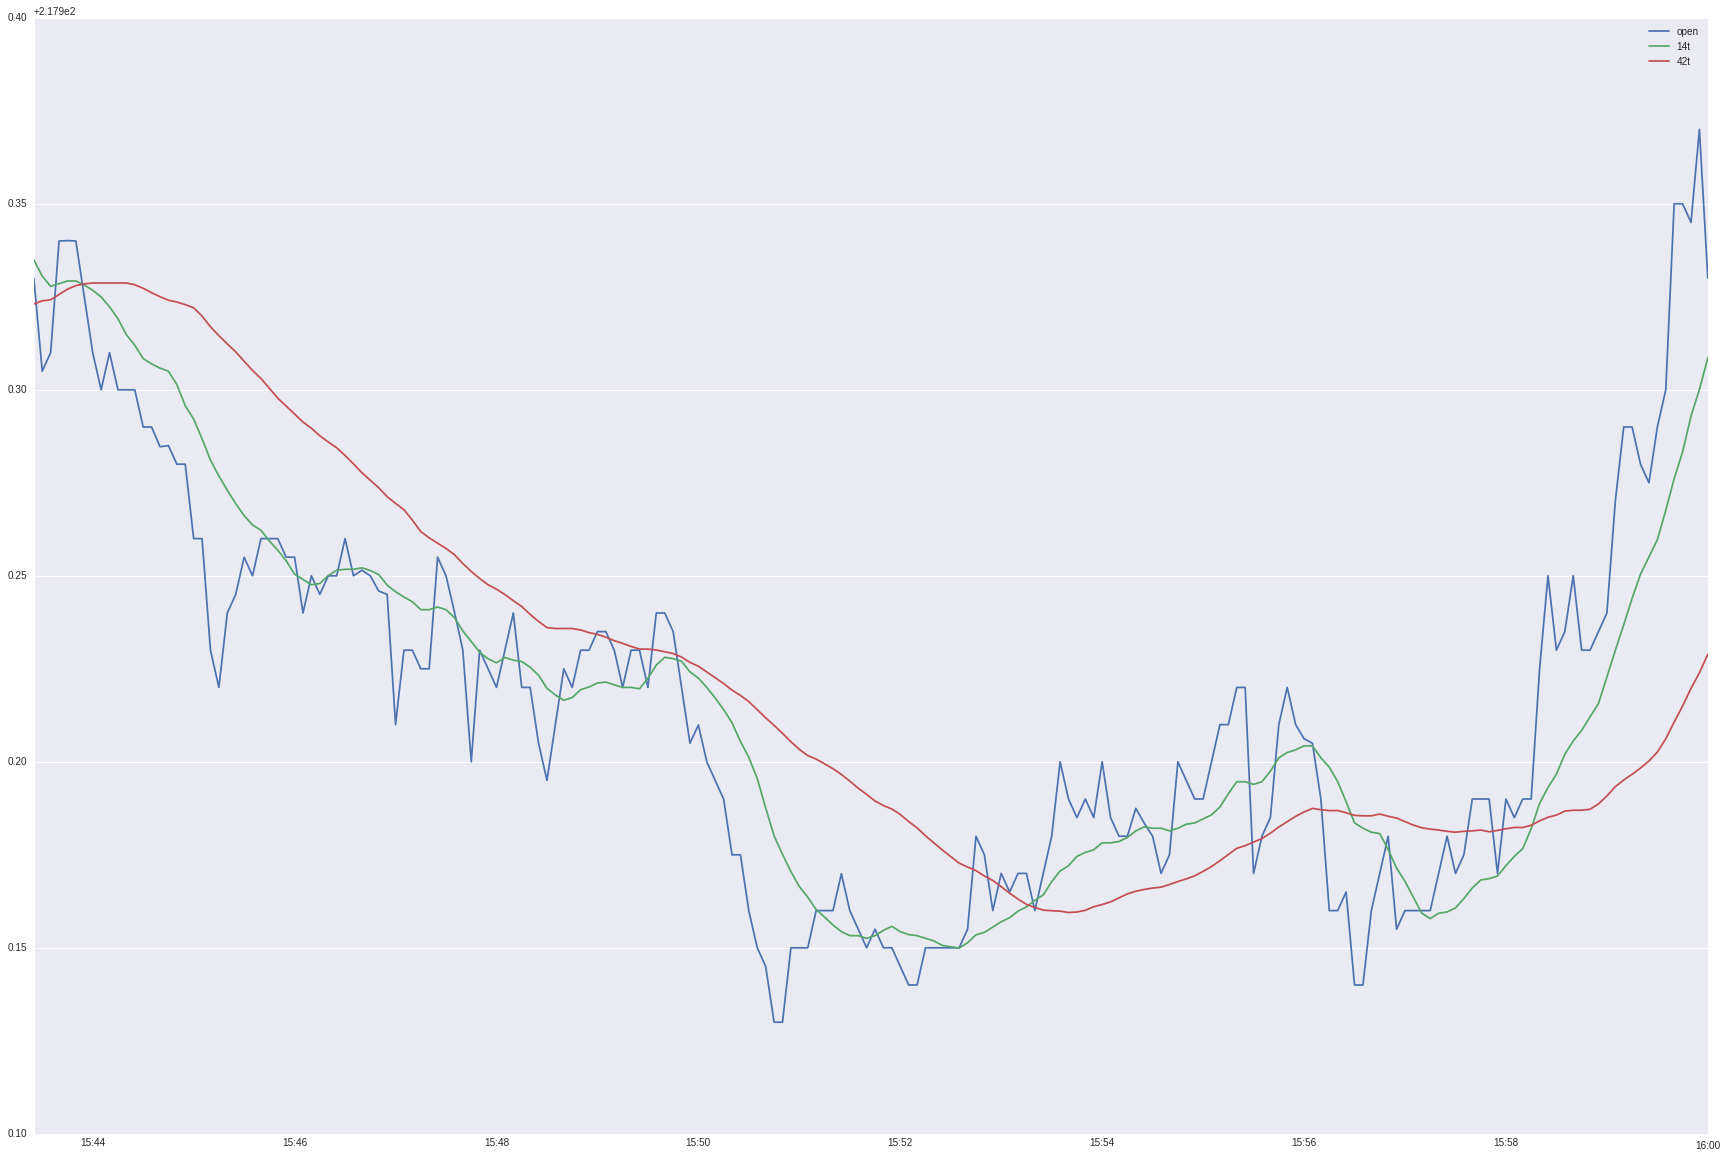

In [24]:
data_price[['open', '14t', '42t']].tail(200).plot(figsize=(30,20), grid=True);

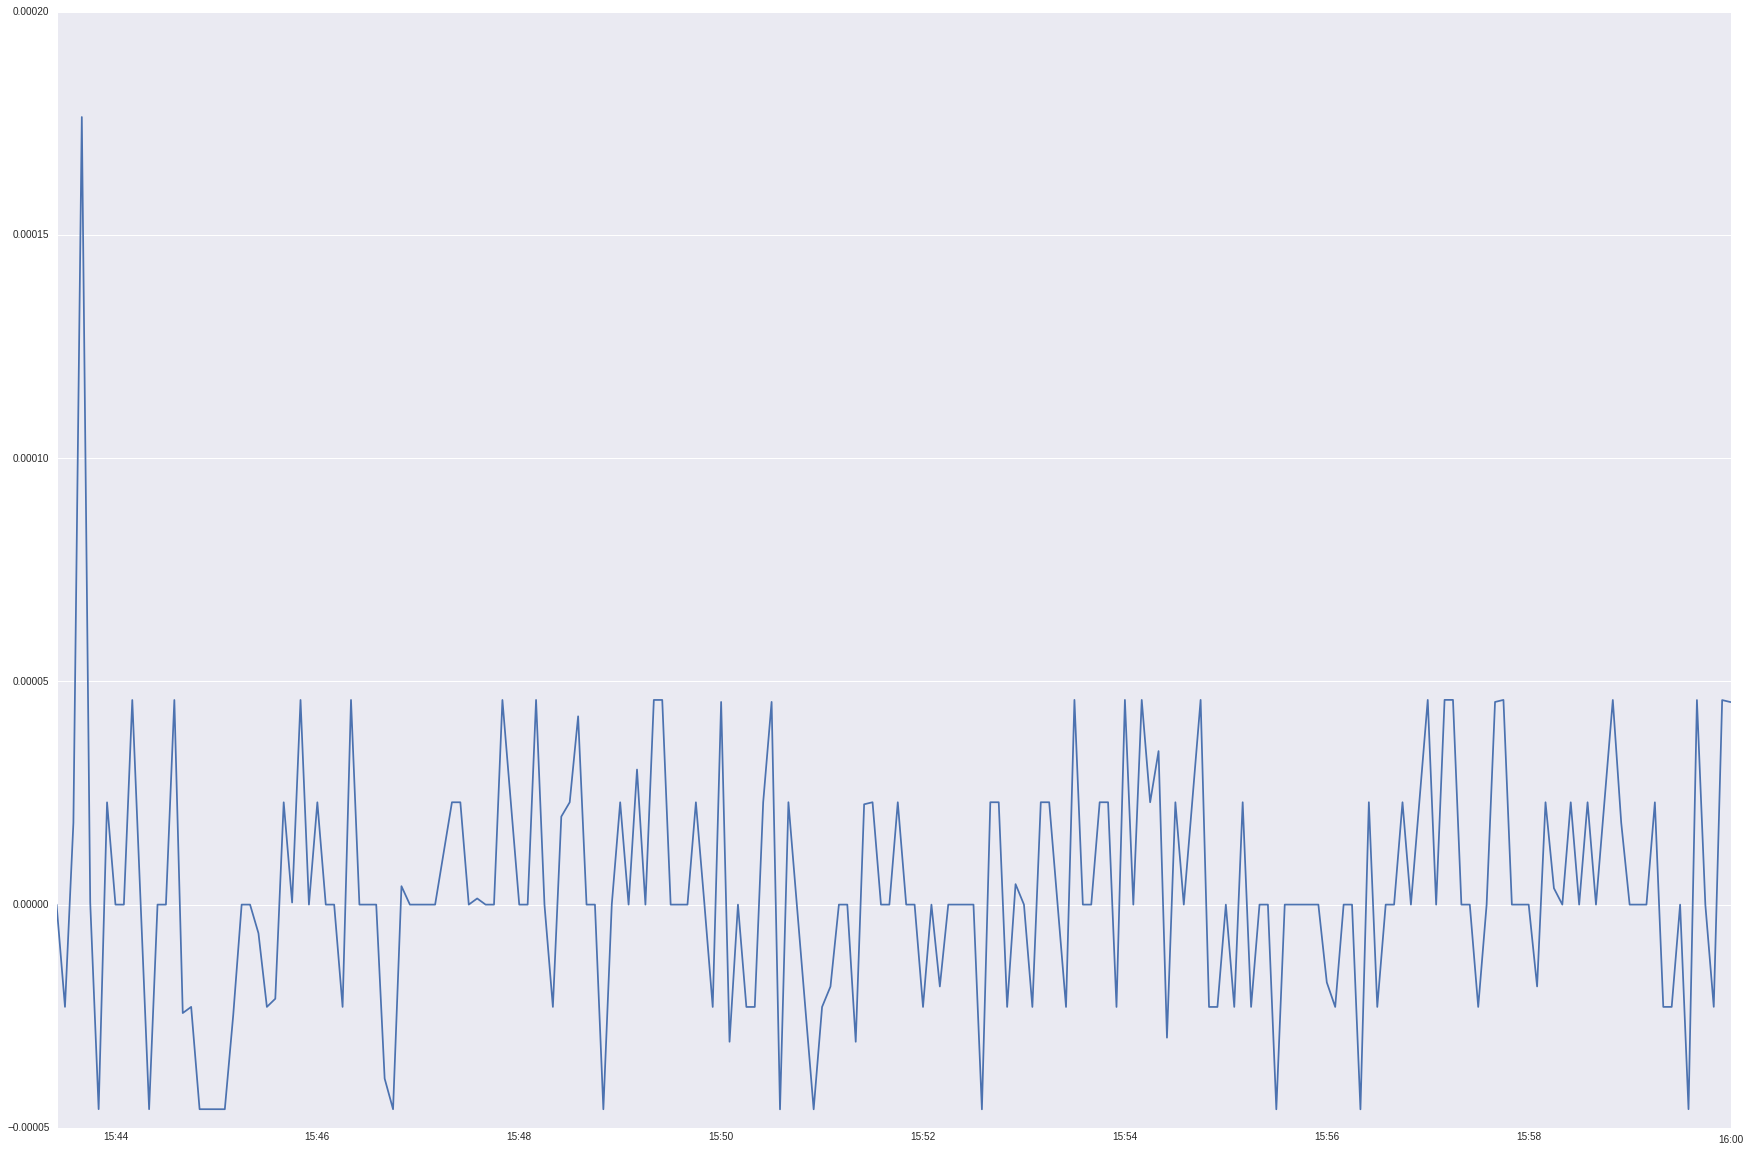

In [26]:
data_price['Return'].tail(200).plot(figsize=(30,20), grid=True); 

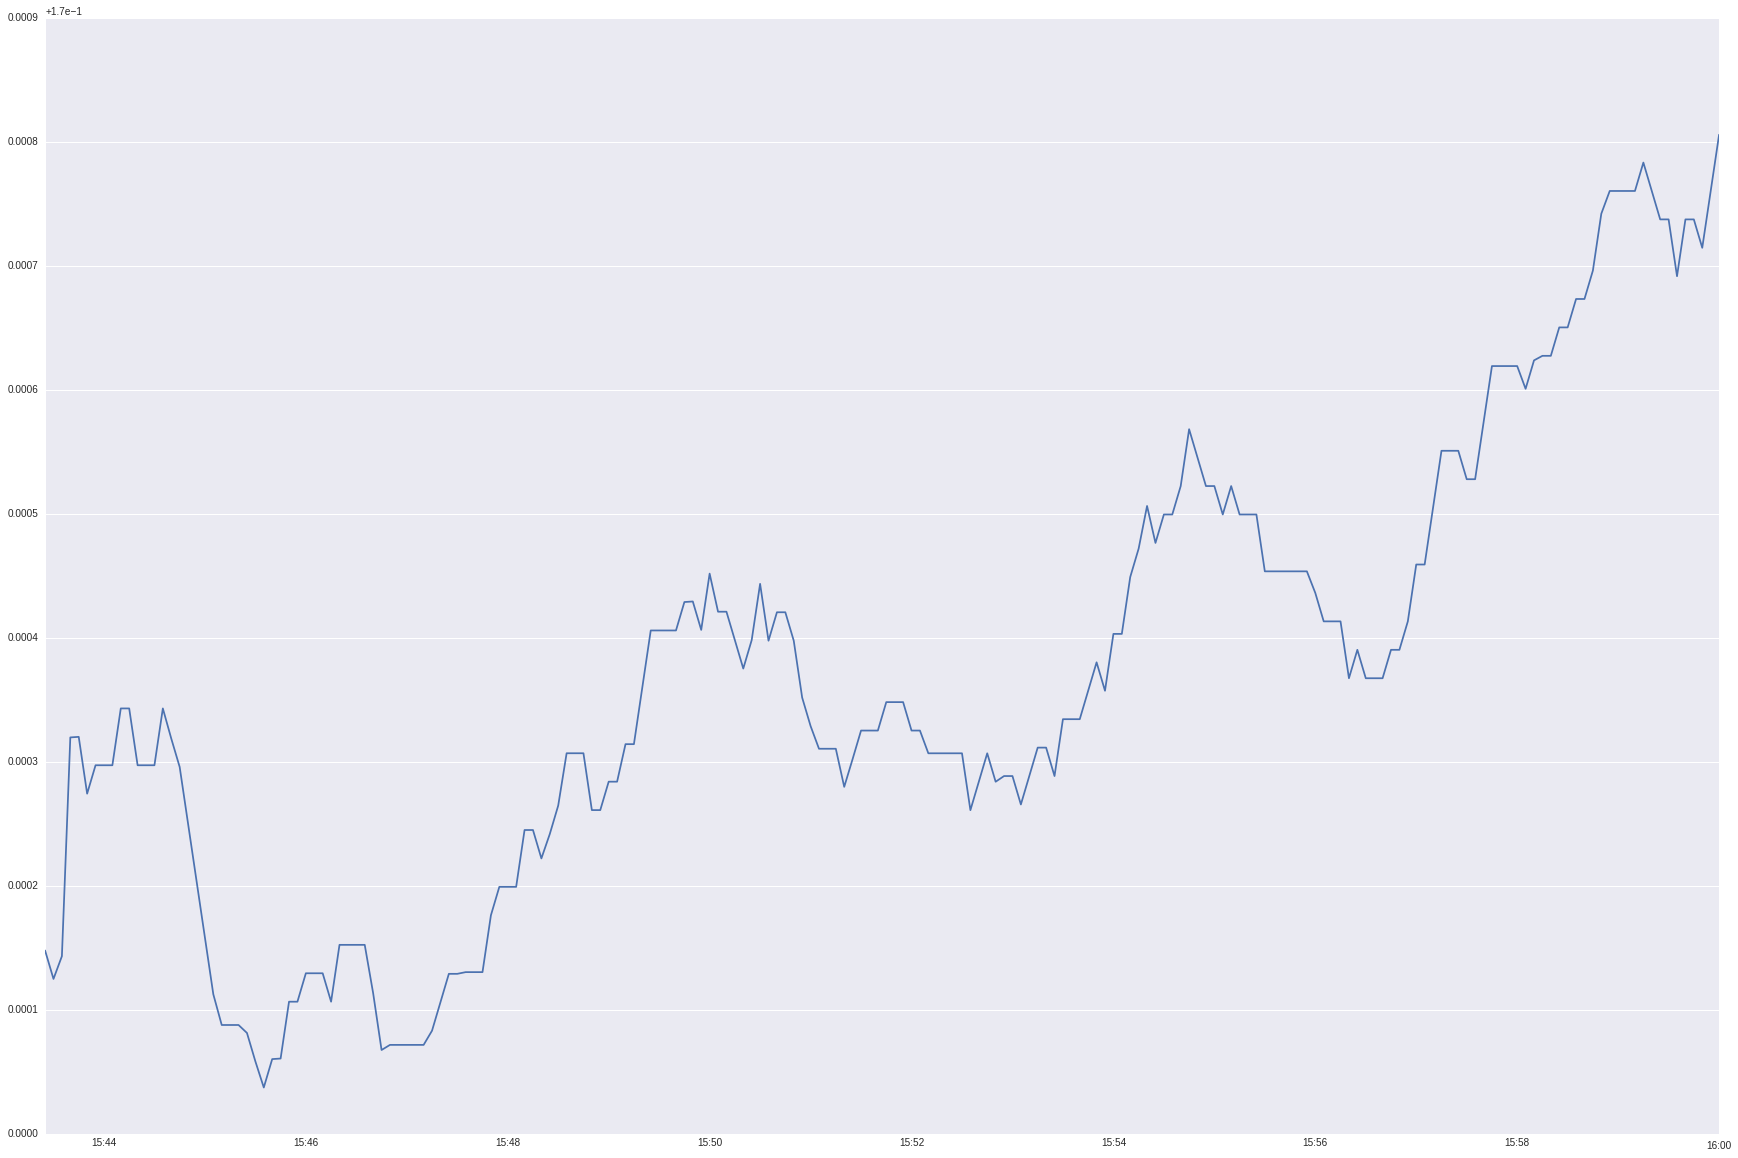

In [27]:
np.cumsum(data_price['Return']).tail(200).plot(figsize=(30,20), grid=True); 

MOMENTUM: J_SPY at low/medium level of the ROC curve==upward indicator

In [29]:
data_price['ROC'] = talib.ROC(np.asarray(data_price['close']), timeperiod=19)## good distribution of return -1 to +1 
data_price['ROC'] = np.where(data_price['ROC']>0.015,data_price['ROC'],np.where(data_price['ROC']<-0.015,data_price['ROC'],0))
#SPY['ROC'] = np.where(np.logical_and(talib.ROC(np.asarray(SPY['close']), timeperiod=19)<-0.1,SPY['J_SPY']>0),1,np.where(np.logical_and(talib.ROC(np.asarray(SPY['close']), timeperiod=19)>0.1,SPY['J_SPY']<0),-1,0))

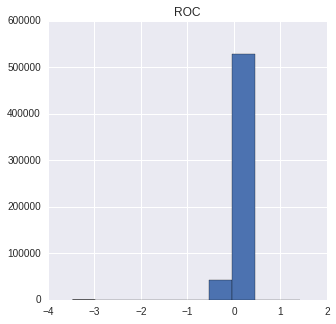

In [30]:
pd.DataFrame.hist(data_price[['ROC']],bins=10,figsize = [5,5]);

Matching DS_SPY.R

In [48]:
spy['TR']=(pd.rolling_sum(spy.volume*P,length)/pd.rolling_sum(spy.volume,length)).shift(3)
#TR is trading line along with P
# Shift forwarded to avoid look back bias
# What would be the lag????

In [49]:
spy['P']=((data_price.high+data_price.low+data_price.close)/3).shift(3)#P=pd.rolling_mean(P,60)

In [61]:
spy['sprd_spy']=spy.close-spy.open

In [52]:
spy.tail()

,high,low,open,close,total_volume,volume,TR,P,sprd_spy
2016-11-15 15:59:40,218.25,218.24,218.250,218.2500,78135333,103381,218.126665,218.183333,0.0000
2016-11-15 15:59:45,218.28,218.23,218.250,218.2500,78361756,223721,218.132888,218.200000,0.0000
2016-11-15 15:59:50,218.28,218.23,218.245,218.2600,78582172,218804,218.143308,218.230000,0.0150
2016-11-15 15:59:55,218.27,218.19,218.270,218.2201,78835059,251190,218.147735,218.246667,-0.0499
2016-11-15 16:00:00,218.27,218.22,218.230,218.2500,79461906,623715,218.157943,218.253333,0.0200


In [58]:
type(spy.close)

pandas.core.series.Series